In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
import random
import pingouin as pg

from sklearn.model_selection import train_test_split
from matplotlib.ticker import FuncFormatter
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm


# 한글 폰트 실행
from matplotlib import rcParams
from matplotlib import font_manager,rc
rcParams['axes.unicode_minus']=False
plt.rcParams['font.family']='NanumGothic'
font_name=font_manager.FontProperties(fname='c:/Windows/Fonts/NanumGothic.ttf').get_name()
rc('font',family=font_name)


# 최근접 이웃 알고리즘의 맹점

In [2]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

## train set, test set으로 분리

In [4]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)

# train set, test set 2차원 배열로 변경
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

train_input.shape

(42, 1)

## 모델 만들기

In [5]:
from sklearn.neighbors import KNeighborsRegressor # 회귀 모델 ==> 수치 예측

knr = KNeighborsRegressor(n_neighbors=3) # 하이퍼파라미터 튜닝
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [6]:
print(knr.predict([[50]]))

[1033.33333333]


## 예측값 결과 시각화

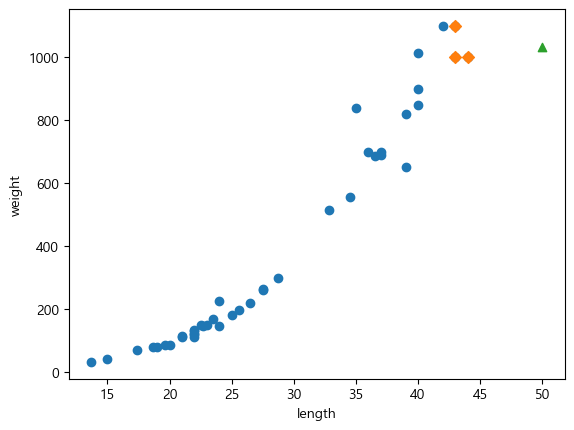

In [8]:
import matplotlib.pyplot as plt

# 50cm 농어의 이웃을 구해보자
distances, indexes = knr.kneighbors([[50]])

# train set의 산점도 그리기
plt.scatter(train_input, train_target)
# train set 중에어 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 50cm 농어데이터
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [9]:
print(knr.predict([[100]])) # 1m

[1033.33333333]


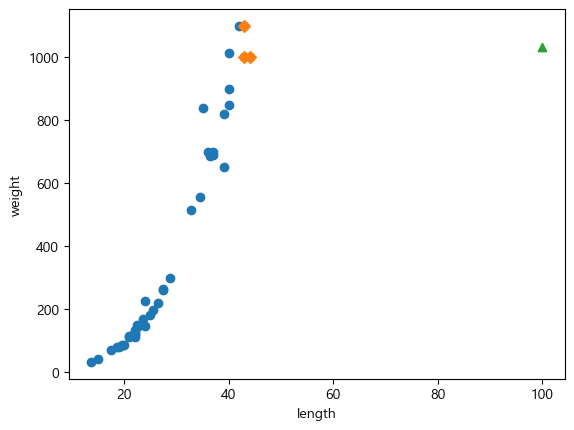

In [10]:
# 100cm 농어의 이웃을 구합니다
distances, indexes = knr.kneighbors([[100]])

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 100cm 농어 데이터
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 머신러닝 다룰 때 주의점
- 데이터셋 분리 : 분류모델을 진행할 때는 층화추출로 진행
- 스케일링 feature의 단위가 다르면, 하나의 단위로 통일시킴
-- Min-Max 스케일링, Standardization
- 알고리즘에 대한 맹신 금지
-- KNN을 통해서 확인한 것처럼, 알고리즘 특성이 가지고 본연의 단점 있음 ==> 찾아서 대안 마련
-- 단순히, 평가지표만 보고 판단하기 어려움

# 선형회귀
- 미션, 50cm 농어에 대한 예측, 100cm 농어에 대한 예측

In [11]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

In [12]:
# 기울기와 절편
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535474


[3192.69585141]
x가 15일 때 [-123.7614705]
x가 50일 때 [1241.83860323]


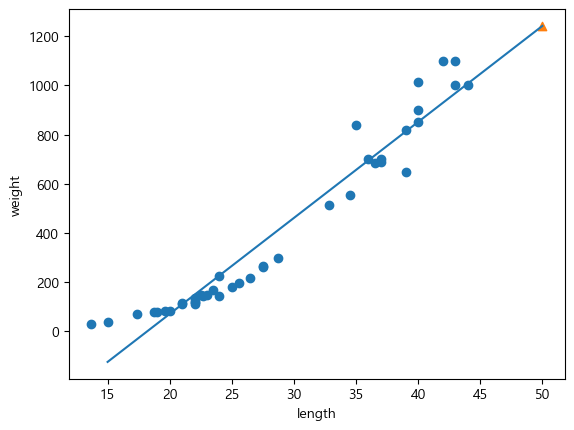

In [13]:
print(lr.predict([[100]])) # 1m

"""
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
"""

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 15에서 50까지 1차 방정식 그래프를 그립니다
#                   y = ax + b
print(f'x가 15일 때 {15*lr.coef_+lr.intercept_}')
print(f'x가 50일 때 {50*lr.coef_+lr.intercept_}')
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 모델 평가

In [14]:
lr.score(train_input, train_target) # 훈련세트에 대한 평가

0.9398463339976041

In [15]:
lr.score(test_input, test_target) # 테스트세트에 대한 평가

0.824750312331356

## 모델 선정 못하는 이유
- 길이가 0이상이면, 무게가 음수가 나올수가 없음
- 해결방안 : 1차함수 ==> 2차함수로 변경

# 다항회귀
- $무게 = a * 길이^2 + b * 길이 + c$

In [16]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

train_input.shape, train_poly.shape

((42, 1), (42, 2))

In [17]:
train_poly[0], train_input[0]

(array([384.16,  19.6 ]), array([19.6]))

In [18]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

                  # 길이^2, 길이
print(lr.predict([[50 ** 2,  50]]))

[1573.98423528]


In [19]:
print(lr.coef_, lr.intercept_)

# y = ax^2 + bx + c

[  1.01433211 -21.55792498] 116.0502107827827


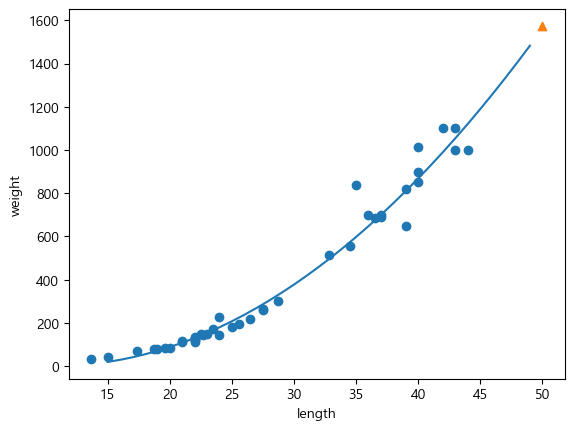

In [20]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듭니다
point = np.arange(15, 50)

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식 그래프를 그립니다
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

# 50cm 농어 데이터
plt.scatter([50], [1574], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 모델 평가

In [21]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122
